In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_target = pd.read_csv('data/original_data/share-with-mental-and-substance-disorders.csv')

In [6]:
df = pd.read_csv('data/clean_df.csv')

In [ ]:
df_1 = pd.read_csv('data/gdp_percapita.csv')

In [ ]:
df_gdp = df_1[['COU', 'YEA', 'Value']]

In [ ]:
df_2 = pd.read_csv('data/population_thousands.csv')

In [ ]:
df_pop = df_2[['COU', 'YEA', 'Value']]

In [ ]:
df_3 = pd.read_csv('data/employment.csv')

In [13]:
df_emp = df_3[['COU', 'YEA', 'Value']]

In [15]:
df_gdp.rename(columns={'Value':'GDP'}, inplace=True)

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
df_pop.rename(columns={'Value':'Population'}, inplace=True)

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df_emp.rename(columns={'Value':'Employment'}, inplace=True)

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [47]:
new_df = pd.merge(df_target, df_gdp, left_on=['Code','Year'], right_on = ['COU','YEA'], how='inner')

In [49]:
new_df = new_df.merge(df_pop, left_on=['Code','Year'], right_on = ['COU','YEA'], how='inner')

In [51]:
new_df = new_df.merge(df_emp, left_on=['Code','Year'], right_on = ['COU','YEA'], how='left')

In [55]:
new_df.rename(columns={'Prevalence - Mental disorders - Sex: Both - Age: Age-standardized (Percent)': 'Prevalence'}, inplace=True)

In [72]:
df = new_df[['Entity', 'Year', 'Prevalence', 'Population', 'GDP', 'Employment']]

In [73]:
df.to_csv('data/clean_df.csv')

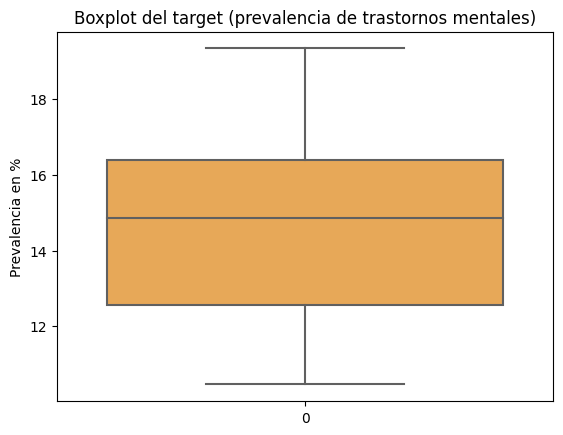

In [146]:
#Ya tenemos todo en un mismo df. Empezamos con un EDA

sns.boxplot(df['Prevalence'], color='#FFAB40')
plt.title('Boxplot del target (prevalencia de trastornos mentales)')
plt.ylabel('Prevalencia en %')
plt.savefig('boxplot_prevalence.png')


C:\Users\Celia\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """


<Figure size 640x480 with 0 Axes>

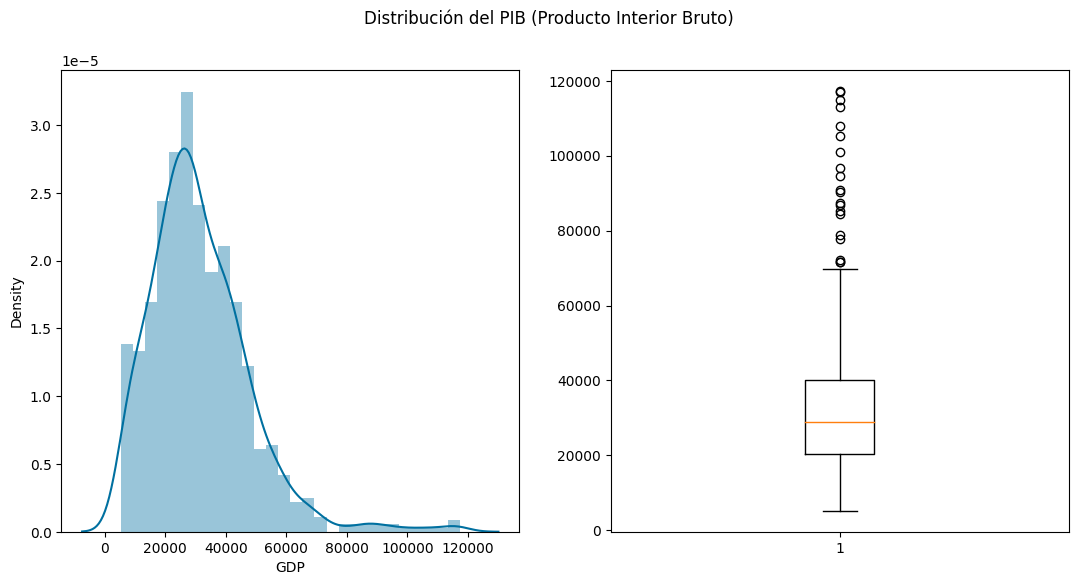

In [145]:
fig = plt.figure()

plt.figure(figsize=(13,6))
plt.subplot(1, 2, 1)
sns.distplot(df['GDP'], color='#0070A0')

plt.subplot(1, 2, 2)
plt.boxplot(df['GDP'])

plt.suptitle('Distribución del PIB (Producto Interior Bruto)')
plt.savefig('gdp_distribution_plots.png')

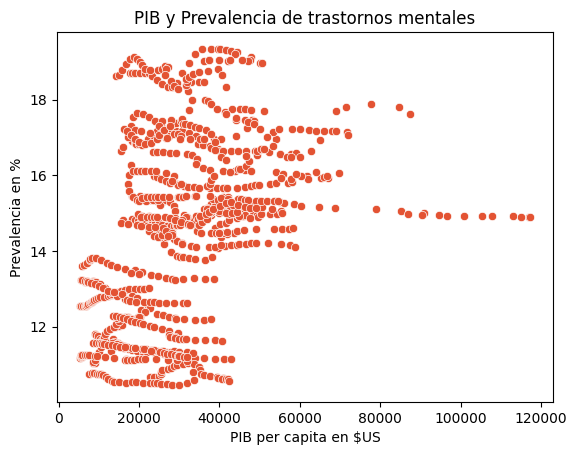

In [147]:
sns.scatterplot(data=df, x='GDP', y='Prevalence', color='#E35333')
plt.title('PIB y Prevalencia de trastornos mentales')
plt.ylabel('Prevalencia en %')
plt.xlabel('PIB per capita en $US')

plt.savefig('scatter_gdp_target.png')

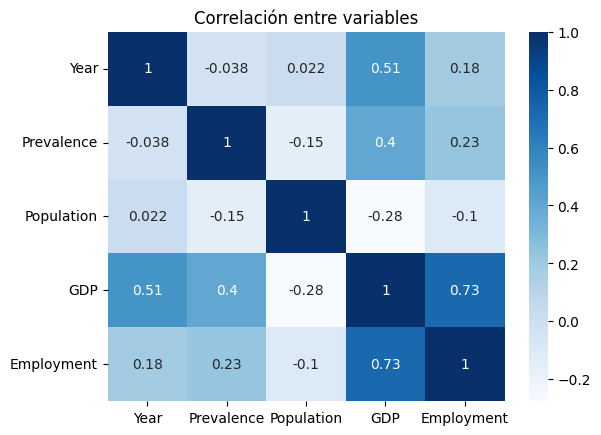

In [119]:
ax = sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlación entre variables')

plt.savefig('heatmap.png')

In [1]:
from utils import functions
X_train, X_test, y_train, y_test = functions.load_data()

In [2]:
#Primer modelo: Regresión logística

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [133]:
df.dropna(inplace=True)

c:\Users\Celia\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [134]:
from sklearn.model_selection import train_test_split

X = df[['GDP', 'Population', 'Employment', 'Year']]
y = df['Prevalence']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [135]:
#Guardamos los datos de train y test en varios csv
X_train.to_csv('regression_X_train.csv')
X_test.to_csv('regression_X_test.csv')
y_train.to_csv('regression_y_train.csv')
y_test.to_csv('regression_y_test.csv')

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(720, 4)
(180, 4)
(720,)
(180,)


In [3]:
model.fit(X_train, y_train)

LinearRegression()

In [4]:
predictions = model.predict(X_test)
predictions

array([[15.782032  ],
       [15.09754019],
       [15.2923497 ],
       [15.35752546],
       [15.32968854],
       [14.09611587],
       [14.7400832 ],
       [12.48070597],
       [15.88806197],
       [14.92192175],
       [12.35594117],
       [17.08138756],
       [14.89015969],
       [14.35029069],
       [13.11814961],
       [15.17886424],
       [13.79054225],
       [14.02733627],
       [14.89715054],
       [15.60352065],
       [13.1432715 ],
       [13.96184917],
       [12.44386389],
       [13.48726458],
       [19.74190833],
       [13.66420752],
       [15.21364367],
       [16.37752557],
       [13.40316182],
       [13.50575339],
       [15.33280198],
       [13.71946512],
       [14.75415181],
       [16.69692969],
       [15.10918052],
       [13.72742423],
       [15.40082637],
       [15.45970038],
       [15.1330691 ],
       [13.18577897],
       [15.60859388],
       [14.89815317],
       [15.15378775],
       [14.0486738 ],
       [13.30190257],
       [16

In [7]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print('MAE:', mean_absolute_error(y_test, predictions))
print('MAPE:', mean_absolute_percentage_error(y_test, predictions))

print('MSE:', mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

MAE: 1.501830250875321
MAPE: 0.10388233450098065
MSE: 4.151767971951564
RMSE: 2.0375887641895662


In [153]:
import pickle

# save the model to disk
filename = 'model/model_linear_reg'
pickle.dump(model, open(filename, 'wb'))

In [161]:
def df_error(predictions,y_test,filename:str):
    error = pd.DataFrame({'Metric': ['MAE', 'MAPE', 'MSE', 'RMSE'], 
                'Error': [mean_absolute_error(y_test,predictions), 
                mean_absolute_percentage_error(y_test,predictions), 
                mean_squared_error(y_test,predictions), 
                np.sqrt(mean_squared_error(y_test,predictions))]})
    
    error.to_csv(filename)
    return error

In [162]:
df_error(predictions,y_test,'error_linear_reg.csv')

,Metric,Error
0,MAE,1.501830
1,MAPE,0.103882
2,MSE,4.151768
3,RMSE,2.037589
